# 機械学習　第８章　実習問題（回帰）

## 問題文に従って各問題ごとにセルを複数追加してプログラムを実装してください。

## ※ 準備作業
### ▶ 以下を実施してください。

In [1]:
# ドライブのマウント
# ディレクトリの作成
# ディレクトリへの移動
# house_rent.csv のアップロード

## ※ matplotlib日本語化のためのライブラリのインストール
### ▶ 以下を実行してください。

In [2]:
!pip install japanize-matplotlib

## データ分析対象データ

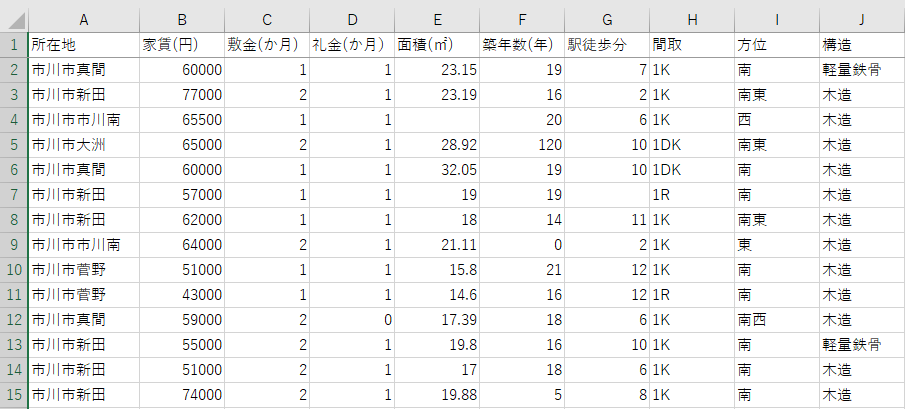

### ■ 正解データ　：　家賃（円）
### ■ 特徴量候補　：　所在地、敷金（か月）、礼金（か月）、面積（㎡）、築年数（年）、駅徒歩、間取、方位、構造

## 問題１　本データのデータ分析において使用する各種ライブラリをインポートしてください。
## また、グラフ表示が同一タブ上に表示されるようにしてください。

In [26]:
import japanize_matplotlib

# pandasをインポートし、別名 pd とする
import pandas as pd

# treeモジュールのインポート
from sklearn import tree

# train_test_splitメソッドのインポート
from sklearn.model_selection import train_test_split

# グラフ描画を当タブに表示
%matplotlib inline

## 問題２　CSVファイル house_rent.csv を読み込んでください。ただし、エンコーディングは cp932 を使用してください。

In [27]:
# house_rent.csv を読み込む
df = pd.read_csv('house_rent.csv', encoding='cp932')

## 問題３　読み込んだCSVファイルの先頭５行と末尾５行を表示してください。

In [28]:
# 先頭の５行を表示
df.head(5)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
0,市川市真間,60000,1,1.0,23.15,19.0,7.0,1K,南,軽量鉄骨
1,市川市新田,77000,2,1.0,23.19,16.0,2.0,1K,南東,木造
2,市川市市川南,65500,1,1.0,NaN,20.0,6.0,1K,西,木造
3,市川市大洲,65000,2,1.0,28.92,120.0,10.0,1DK,南東,木造
4,市川市真間,60000,1,1.0,32.05,19.0,10.0,1DK,南,木造


In [29]:
# 末尾の５行を表示
df.tail(5)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
299,市川市新田,64000,2,1.0,22.01,NaN,5.0,1R,南,木造
300,市川市新田,52000,1,0.0,18.02,25.0,13.0,1K,南東,軽量鉄骨
301,市川市新田,57000,1,1.0,21.70,20.0,10.0,1K,南,木造
302,市川市真間,60000,1,1.0,20.37,13.0,14.0,1K,西,鉄骨造
303,市川市新田,72000,2,1.0,20.70,0.0,2.0,1K,東,鉄骨造


## 問題４　質的データの列をすべて挙げてください。つぎに、それらの列にデータが何種類あるかを調べて表示してください。

In [30]:
# 質的データの列を取り出し
x = ['所在地','間取','方位','構造']
df[x]

,所在地,間取,方位,構造
0,市川市真間,1K,南,軽量鉄骨
1,市川市新田,1K,南東,木造
2,市川市市川南,1K,西,木造
3,市川市大洲,1DK,南東,木造
4,市川市真間,1DK,南,木造
...,...,...,...,...
299,市川市新田,1R,南,木造
300,市川市新田,1K,南東,軽量鉄骨
301,市川市新田,1K,南,木造
302,市川市真間,1K,西,鉄骨造


In [31]:
# 所在地の種類を表示
df['所在地'].value_counts()

市川市新田     104
市川市市川南     74
市川市真間      42
市川市大洲      30
市川市市川      26
市川市菅野      20
市川市須和田      3
市川市平田       3
市川市大町       1
市川市大和田      1
Name: 所在地, dtype: int64

In [32]:
# 間取の種類を表示
df['間取'].value_counts()

1K     229
1R      44
1DK     31
Name: 間取, dtype: int64

In [33]:
# 方位の種類を表示
df['方位'].value_counts()

南     167
南東     48
東      30
西      26
南西     26
北東      4
北       3
Name: 方位, dtype: int64

In [34]:
# 構造の種類を表示
df['構造'].value_counts()

木造      249
軽量鉄骨     44
鉄骨造      10
Name: 構造, dtype: int64

## 問題５　質的データをすべてダミー化してデータ分析させるデータフレームを作成して下さい。次に、作成したデータフレームの先頭５行を表示してください。

In [35]:
# 質的データをダミー化
# df2 = pd.get_dummies(df,drop_first = False)  一時Trueだとエラー？
df2 = pd.get_dummies(df,drop_first = True) 

# 先頭5行を表示
df2.head(5)

,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,...,間取_1K,間取_1R,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_軽量鉄骨,構造_鉄骨造
0,60000,1,1.0,23.15,19.0,7.0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,77000,2,1.0,23.19,16.0,2.0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,65500,1,1.0,NaN,20.0,6.0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,65000,2,1.0,28.92,120.0,10.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,60000,1,1.0,32.05,19.0,10.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## 問題６　問題５で作成したデータフレームにおいて、訓練データ、検証データ、テストデータに分割してください。
### ただし、訓練データとテストデータの比率は８：２、乱数シードは０とします。

In [36]:
# 訓練データとテストデータに分割　8:2
# 変数名 train_vol（訓練データ）、test_vol（テストデータ）
train_vol, test_vol = train_test_split(df2, test_size=0.2, random_state=0)


## 問題７　訓練データにおいて、欠損値を確認して表示し、平均値で穴埋めしてください。欠損値処理した訓練データの先頭５行を表示してください。

In [37]:
# train_vol(訓練データ)の欠損値を確認
train_vol.isnull().sum()

家賃(円)         0
敷金(か月)        0
礼金(か月）        0
面積(㎡)         1
築年数(年)        1
駅徒歩分          1
所在地_市川市大洲     0
所在地_市川市大町     0
所在地_市川市市川     0
所在地_市川市市川南    0
所在地_市川市平田     0
所在地_市川市新田     0
所在地_市川市真間     0
所在地_市川市菅野     0
所在地_市川市須和田    0
間取_1K         0
間取_1R         0
方位_北東         0
方位_南          0
方位_南東         0
方位_南西         0
方位_東          0
方位_西          0
構造_軽量鉄骨       0
構造_鉄骨造        0
dtype: int64

In [38]:
# 欠損値を平均値で穴埋め（変数名:train_vol2）

# 項目で穴埋め：エラーにより失敗　※解決不明
#col_train['面積(㎡)'] = col_train['面積(㎡)'].fillna(col_train['面積(㎡)'].mean())
#col_train['築年数(年)'] = col_train['築年数(年)'].fillna(col_train['築年数(年)'].mean())
#col_train['駅徒歩分'] = col_train['駅徒歩分'].fillna(col_train['駅徒歩分'].mean())

# データフレーム全体で穴埋め
train_vol2 = train_vol.fillna(train_vol.mean())

# 穴埋め後に先頭5行を表示
train_vol2.head(5)

,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,...,間取_1K,間取_1R,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_軽量鉄骨,構造_鉄骨造
176,69000,2,1.0,19.87,1.0,2.0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
26,70000,2,2.0,31.53,28.0,8.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
74,65000,2,1.0,28.92,12.0,10.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
101,51000,1,1.0,20.50,20.0,2.0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
154,72000,2,1.0,20.70,0.0,2.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


## 問題８　外れ値処理をしてください。
### ただし、処理過程を説明できるようにセルを構成してください。

C:\Users\t_honda\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


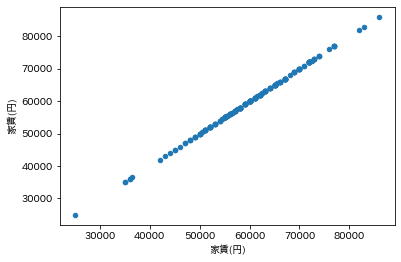

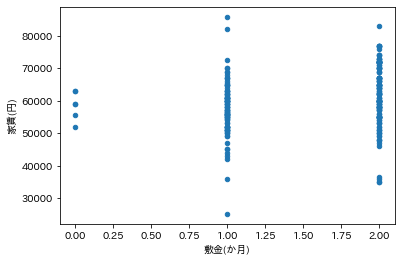

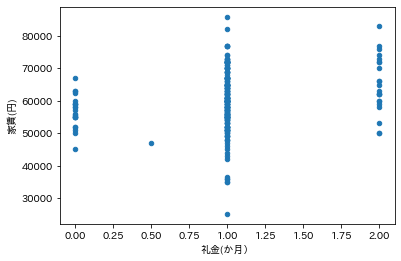

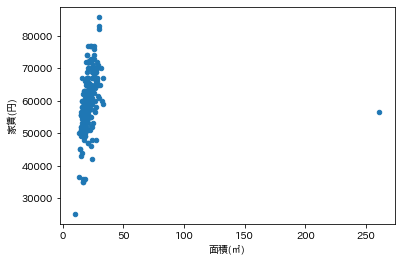

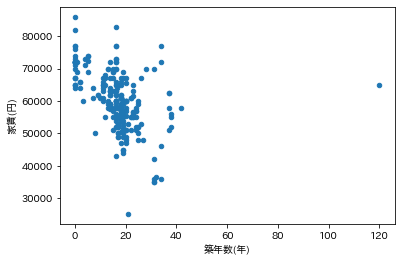

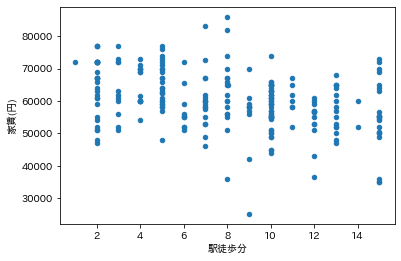

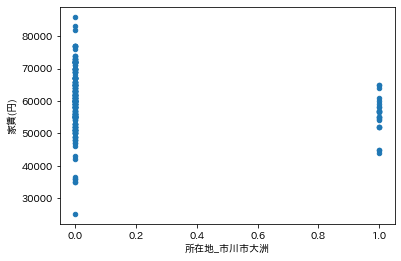

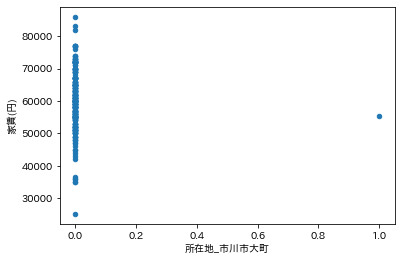

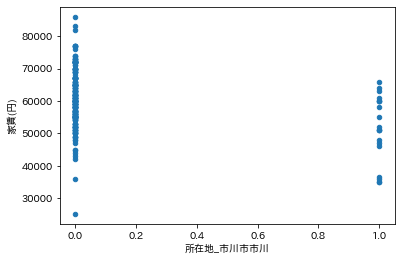

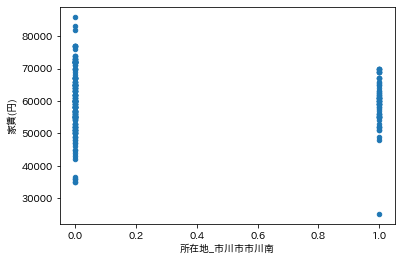

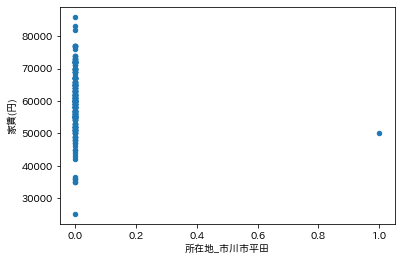

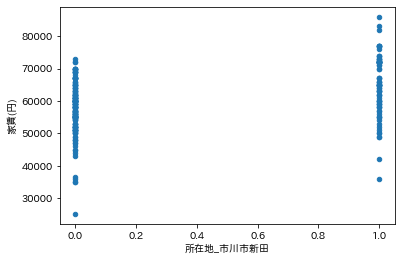

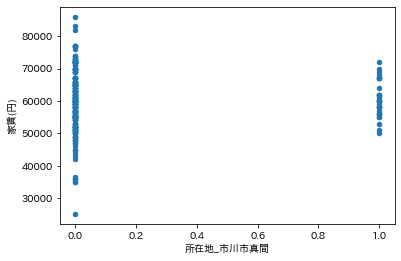

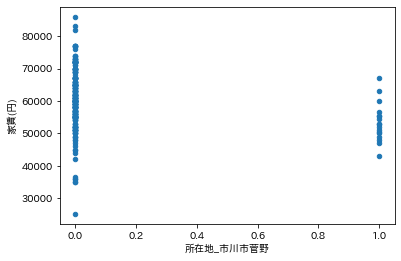

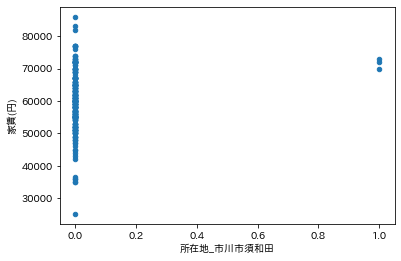

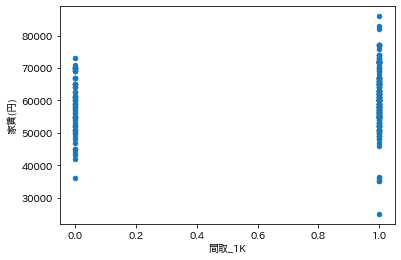

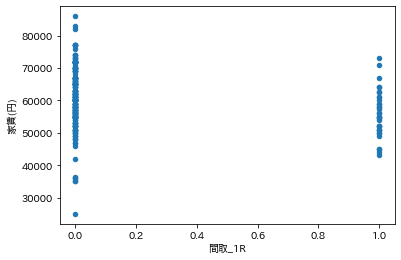

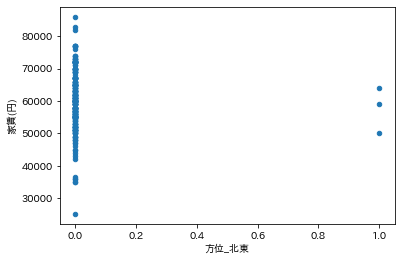

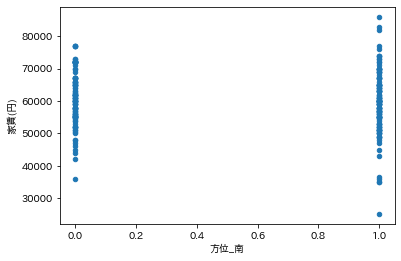

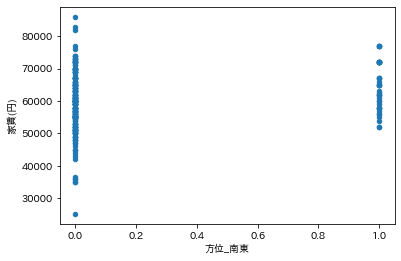

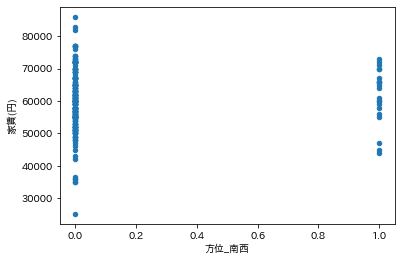

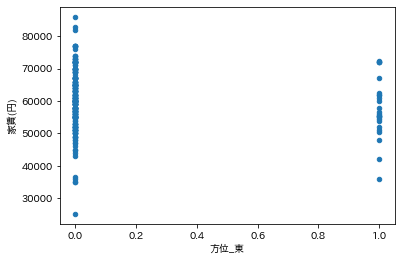

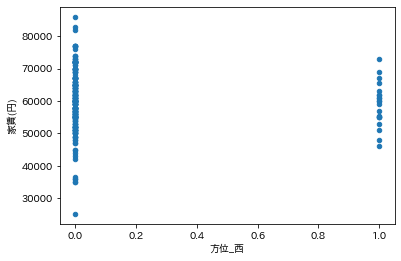

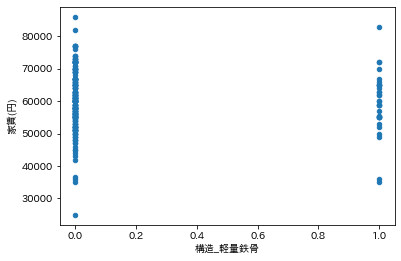

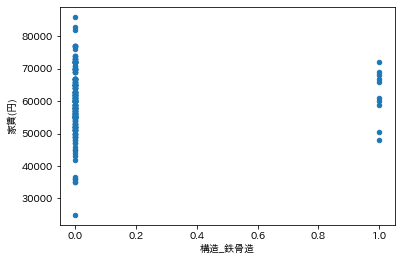

In [39]:
# 「家賃(円)」と「その他の項目」の相関関係を確認
colname = train_vol2.columns
for name in colname:
     train_vol2.plot(kind = 'scatter', x = name, y = '家賃(円)')

In [40]:
# 「家賃(円)」と「面積(㎡)」・「築年数(年)」の外れ値のインデックスを確認  
out_line1 = train_vol2[train_vol2['面積(㎡)'] > 200].index
out_line2 = train_vol2[train_vol2['築年数(年)'] > 100].index
out_line3 = train_vol2[train_vol2['家賃(円)'] < 30000].index

# 外れ値のインデックスを表示
print(out_line1, out_line2,out_line3)

Int64Index([95], dtype='int64') Int64Index([3], dtype='int64') Int64Index([224], dtype='int64')


In [41]:
# 外れ値を削除（変数名:train_vol2）
train_vol3 = train_vol2.drop([95, 3, 224], axis = 0)

## 問題９　外れ値処理の結果を表示してください。

In [42]:
# 「外れ値の削除前」と「外れ値の削除後」の行数を表示 
vol2 = train_vol2.shape[0]  # 外れ値削除「前」の行数を取得  
vol3 = train_vol3.shape[0]  # 外れ値削除「後」の行数を取得
print("処理前：",vol2,"　処理後：",vol3) 

処理前： 243 　処理後： 240


## 問題１０　正解データと各特徴量の相関関係を説明できるように表示してください。

C:\Users\t_honda\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


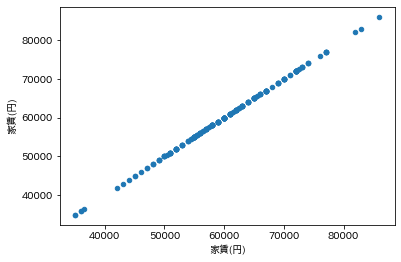

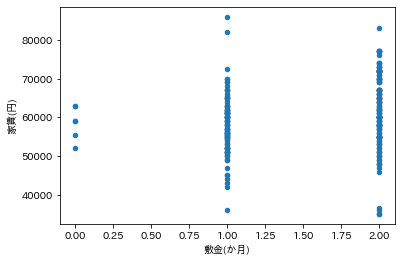

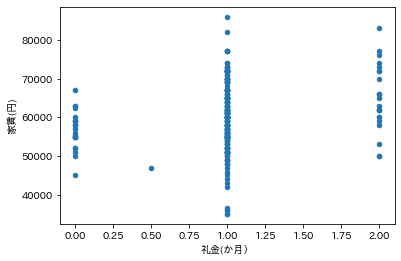

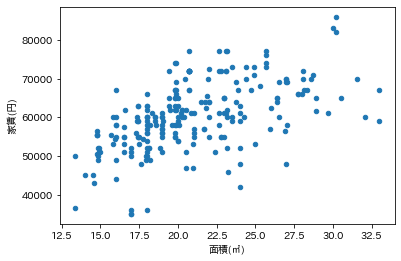

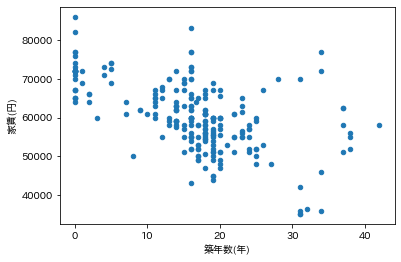

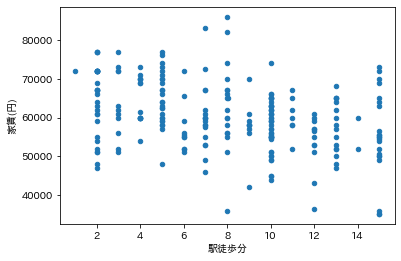

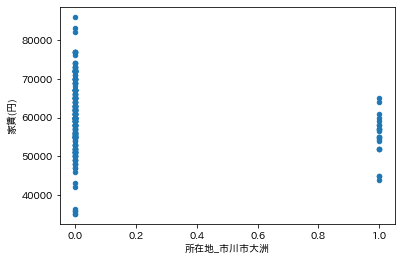

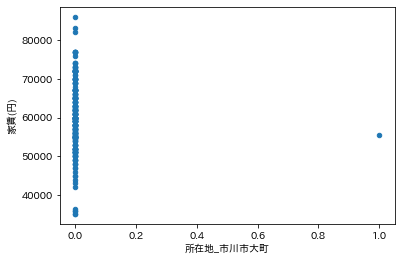

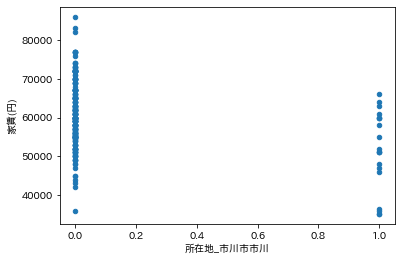

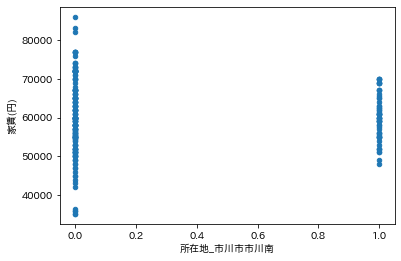

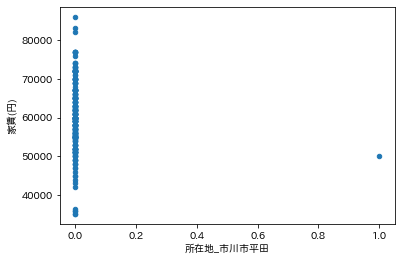

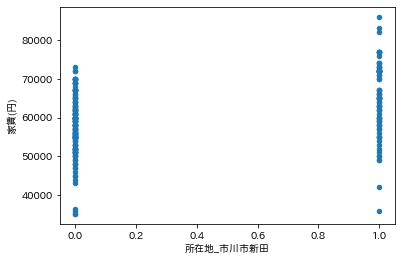

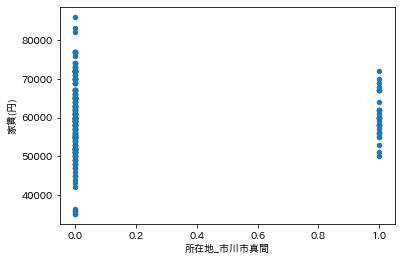

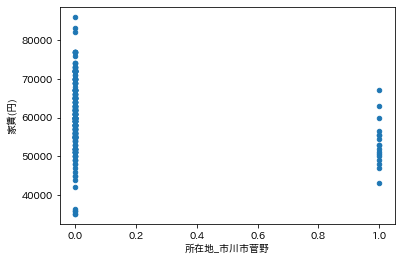

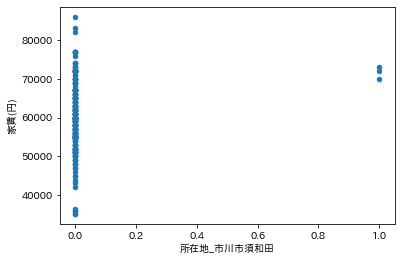

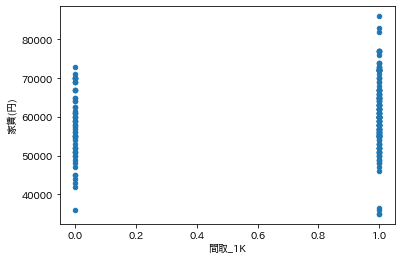

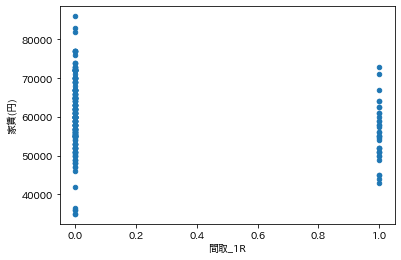

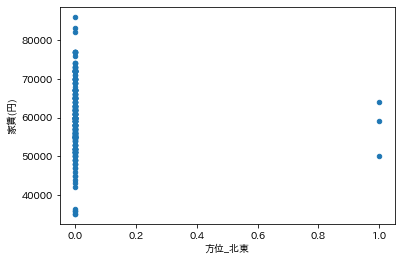

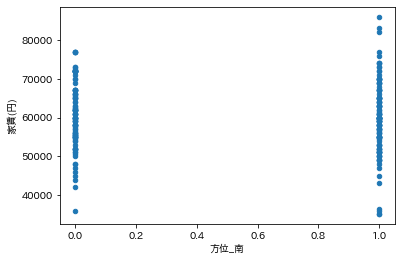

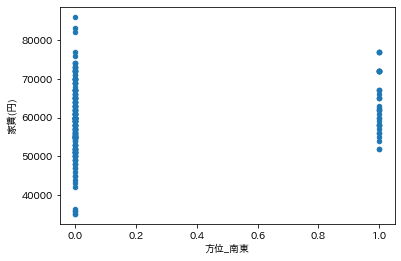

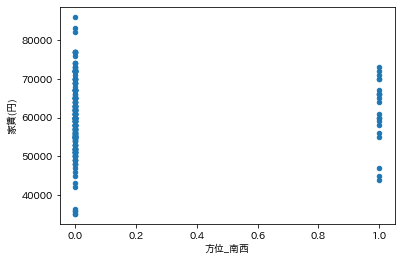

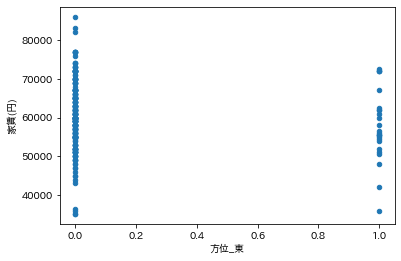

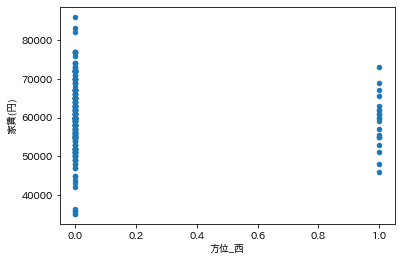

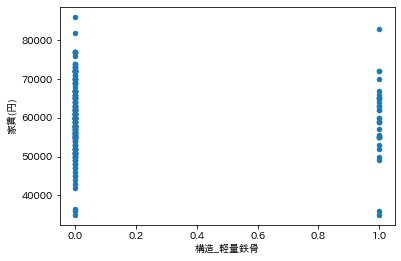

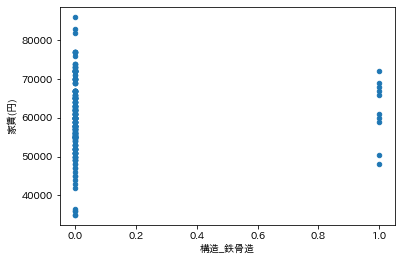

In [43]:
# 外れ値を削除後の「家賃(円)」と「その他の項目」の相関関係を確認
colname = train_vol3.columns
for name in colname:
     train_vol3.plot(kind = 'scatter', x = name, y = '家賃(円)')

## 問題１１　正解データと特徴量を抽出し、それぞれの先頭５行を表示してください。

In [44]:
# 正解データを抽出（変数名：t）
t = train_vol3['家賃(円)']
# 先頭5行を表示
t.head(5)

176    69000
26     70000
74     65000
101    51000
154    72000
Name: 家賃(円), dtype: int64

In [45]:
# 特徴を取り出す（変数名：x）
x = train_vol3.loc[ : , '敷金(か月)':'構造_鉄骨造']
# 先頭5行を表示
x.head(5)

,敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,...,間取_1K,間取_1R,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_軽量鉄骨,構造_鉄骨造
176,2,1.0,19.87,1.0,2.0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
26,2,2.0,31.53,28.0,8.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
74,2,1.0,28.92,12.0,10.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
101,1,1.0,20.50,20.0,2.0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
154,2,1.0,20.70,0.0,2.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


## 問題１２　問題１１で抽出した正解データと特徴量を使用して、訓練データと検証データに分割してください。
### ただし、訓練データと検証データの比率は８：２、乱数シードは０とします。

In [46]:
# 訓練データと検証データに分割　8:2
# 変数名 x_train（特徴量の訓練データ）、x_test（特徴量の検証データ）
# 変数名 y_train（正解データの訓練データ）、x_test（正解データの検証データ）
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=0)

## 問題１３　線形重回帰モデルを使用して学習さて、検証データで決定係数を求めて表示してください。

In [52]:
# 訓練データで学習、検証データで決定係数
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# 訓練データ（〇〇_train）で学習
model.fit(x_train, y_train)
# 検証データ（〇〇_test）で決定係数
m1 = model.score(x_test, y_test)
m1

0.6738551021641739

## 問題１４　問題１３で学習したモデルを使用して以下のデータを使用して家賃がいくらになるか予測させてください。
### 予測させるデータは以下の通りです。
#### 敷金：１か月
#### 礼金；１か月
#### 面積：３０㎡
#### 築年数：３年
#### 駅徒歩分：１０分
#### 所在地：市川市新田
#### 間取：１DK
#### 方位：南向き
#### 構造：鉄骨造


In [56]:
#列名を確認
print(x_train.columns) 

Index(['敷金(か月)', '礼金(か月）', '面積(㎡)', '築年数(年)', '駅徒歩分', '所在地_市川市大洲', '所在地_市川市大町',
       '所在地_市川市市川', '所在地_市川市市川南', '所在地_市川市平田', '所在地_市川市新田', '所在地_市川市真間',
       '所在地_市川市菅野', '所在地_市川市須和田', '間取_1K', '間取_1R', '方位_北東', '方位_南', '方位_南東',
       '方位_南西', '方位_東', '方位_西', '構造_軽量鉄骨', '構造_鉄骨造'],
      dtype='object')


In [58]:
# 上記内容で予測家賃を表示
t_data = [[1, 1.0, 30.0, 3.0, 10.0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]] #桁数調整が必要
restule = model.predict(t_data)
restule

array([67777.37813929])

## 問題１５　特徴量エンジニアリングで訓練データと検証データの決定係数が特徴量エンジニアリングを行う前より良くなるようにしてください。
### ただし、特徴量エンジニアリングの過程が理解できるようにセルを構成してください。

In [59]:
# 各列と「家賃」との相関関係を表示
train_vol3.corr()['家賃(円)']

家賃(円)         1.000000
敷金(か月)        0.210300
礼金(か月）        0.214645
面積(㎡)         0.537035
築年数(年)       -0.565356
駅徒歩分         -0.374357
所在地_市川市大洲    -0.184718
所在地_市川市大町    -0.035924
所在地_市川市市川    -0.296395
所在地_市川市市川南   -0.010534
所在地_市川市平田    -0.076769
所在地_市川市新田     0.381552
所在地_市川市真間     0.012311
所在地_市川市菅野    -0.218603
所在地_市川市須和田    0.146336
間取_1K         0.157105
間取_1R        -0.208472
方位_北東        -0.034498
方位_南         -0.061558
方位_南東         0.205315
方位_南西         0.047253
方位_東         -0.102472
方位_西         -0.049243
構造_軽量鉄骨      -0.038390
構造_鉄骨造        0.040995
Name: 家賃(円), dtype: float64

In [61]:
# learn関数の定義
def learn(x,t):
  # 訓練データと検証データに分割　8:2
  x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=0)

  model = LinearRegression()
  # 訓練データで学習 
  model.fit(x_train, y_train)
  # 訓練データの決定係数
  train_score = model.score(x_train, y_train)
  # 検証データの決定係数
  test_score = model.score(x_test, y_test)

  return train_score, test_score

In [62]:
# チューニング（特徴量エンジニアリング）

# 特徴量と正解データを取り出し
x = train_vol3.loc[ : , '敷金(か月)':'構造_鉄骨造']
t = train_vol3['家賃(円)']

# チューニング（多項式）
x['面積(㎡)2'] = x['面積(㎡)'] ** 2
x['築年数(年)2'] = x['築年数(年)'] ** 2
x['駅徒歩分'] = x['駅徒歩分'] ** 2

# learn関数を呼び出し（訓練・検証に分割、学習、決定係数）
m2, m3 = learn(x, t)

# チューニング前　と　訓練・検証データの差を表示
print("「チューニング前」との比較",)
print(m2, " - ", m1, " = ", "訓練データとの差", m2 - m1)
print(m3, " - ", m1, " = ", "検証データとの差", m3 - m1)


「チューニング前」との比較
0.7069963094547116  -  0.6738551021641739  =  訓練データとの差 0.03314120729053771
0.6564615258131428  -  0.6738551021641739  =  検証データとの差 -0.017393576351031115


In [63]:
# チューニング（特徴量エンジニアリング）

# 特徴量と正解データを取り出し
x = train_vol3.loc[ : , '敷金(か月)':'構造_鉄骨造']
t = train_vol3['家賃(円)']

# チューニング（多項式）
x['面積(㎡)2'] = x['面積(㎡)'] ** 2
x['築年数(年)2'] = x['築年数(年)'] ** 2

# learn関数を呼び出し（訓練・検証に分割、学習、決定係数）
m2, m3 = learn(x, t)

# チューニング前　と　訓練・検証データの差を表示
print("「チューニング前」との比較",)
print(m2, " - ", m1, " = ", "訓練データとの差", m2 - m1)
print(m3, " - ", m1, " = ", "検証データとの差", m3 - m1)

「チューニング前」との比較
0.7082278810281377  -  0.6738551021641739  =  訓練データとの差 0.03437277886396384
0.6708740430270668  -  0.6738551021641739  =  検証データとの差 -0.0029810591371071116


In [64]:
# チューニング（特徴量エンジニアリング）

# 特徴量と正解データを取り出し
x = train_vol3.loc[ : , '敷金(か月)':'構造_鉄骨造']
t = train_vol3['家賃(円)']

# チューニング（多項式）
x['面積(㎡)2'] = x['面積(㎡)'] ** 3
x['築年数(年)2'] = x['築年数(年)'] ** 3
x['駅徒歩分'] = x['駅徒歩分'] ** 2

t = train_vol3['家賃(円)']

# learn関数を呼び出し（訓練・検証に分割、学習、決定係数）
m2, m3 = learn(x, t)

# チューニング前　と　訓練・検証データの差を表示
print("「チューニング前」との比較",)
print(m2, " - ", m1, " = ", "訓練データとの差", m2 - m1)
print(m3, " - ", m1, " = ", "検証データとの差", m3 - m1)

「チューニング前」との比較
0.7077419328681684  -  0.6738551021641739  =  訓練データとの差 0.033886830703994564
0.6644706693469622  -  0.6738551021641739  =  検証データとの差 -0.009384432817211685


In [65]:
# チューニング（特徴量エンジニアリング）

# 特徴量と正解データを取り出し
x = train_vol3.loc[ : , '敷金(か月)':'構造_鉄骨造']
t = train_vol3['家賃(円)']

# チューニング（交互作用特徴量）
x['面積(㎡)*築年数(年)'] = x['面積(㎡)'] * x['築年数(年)']

# learn関数を呼び出し（訓練・検証に分割、学習、決定係数）
m2, m3 = learn(x, t)

# チューニング前　と　訓練・検証データの差を表示
print("「チューニング前」との比較",)
print(m2, " - ", m1, " = ", "訓練データとの差", m2 - m1)
print(m3, " - ", m1, " = ", "検証データとの差", m3 - m1)

「チューニング前」との比較
0.7118190272204149  -  0.6738551021641739  =  訓練データとの差 0.03796392505624102
0.6800364859223149  -  0.6738551021641739  =  検証データとの差 0.006181383758141035


In [66]:
# チューニング（特徴量エンジニアリング）

# 特徴量と正解データを取り出し
x = train_vol3.loc[ : , '敷金(か月)':'構造_鉄骨造']
t = train_vol3['家賃(円)']

# チューニング（多項式）
x['面積(㎡)2'] = x['面積(㎡)'] ** 3
x['築年数(年)2'] = x['築年数(年)'] ** 3
x['駅徒歩分'] = x['駅徒歩分'] ** 2
# チューニング（交互作用特徴量）
x['面積(㎡)*築年数(年)'] = x['面積(㎡)'] * x['築年数(年)']

# learn関数を呼び出し（訓練・検証に分割、学習、決定係数）
m2, m3 = learn(x, t)

# チューニング前　と　訓練・検証データの差を表示
print("「チューニング前」との比較",)
print(m2, " - ", m1, " = ", "訓練データとの差", m2 - m1)
print(m3, " - ", m1, " = ", "検証データとの差", m3 - m1)

「チューニング前」との比較
0.7119069079005055  -  0.6738551021641739  =  訓練データとの差 0.0380518057363316
0.6729664087420427  -  0.6738551021641739  =  検証データとの差 -0.0008886934221311593


In [67]:
# チューニング（特徴量エンジニアリング）
# x['面積(㎡)2*築年数(年)2'] = x['面積(㎡)2*築年数(年)2'] ** 2を追加すると精度が下がる

# 特徴量と正解データを取り出し
x = train_vol3.loc[ : , '敷金(か月)':'構造_鉄骨造']
t = train_vol3['家賃(円)']

# チューニング（多項式）
x['面積(㎡)2'] = x['面積(㎡)'] ** 3
x['築年数(年)2'] = x['築年数(年)'] ** 3
x['駅徒歩分'] = x['駅徒歩分'] ** 2
# チューニング（交互作用特徴量）
x['面積(㎡)*築年数(年)'] = x['面積(㎡)'] * x['築年数(年)']
x['築年数(年)*駅徒歩分'] = x['築年数(年)'] * x['駅徒歩分'] 

# learn関数を呼び出し（訓練・検証に分割、学習、決定係数）
m2, m3 = learn(x, t)

# チューニング前　と　訓練・検証データの差を表示
print("「チューニング前」との比較",)
print(m2, " - ", m1, " = ", "訓練データとの差", m2 - m1)
print(m3, " - ", m1, " = ", "検証データとの差", m3 - m1)

「チューニング前」との比較
0.712138864995054  -  0.6738551021641739  =  訓練データとの差 0.038283762830880086
0.6809003673874383  -  0.6738551021641739  =  検証データとの差 0.00704526522326443


## 問題１６　チューニング結果を受けて、データの標準化後再学習をしてください。

In [68]:
# 訓練データ（訓練・検証）を標準化後に再学習

from sklearn.preprocessing import StandardScaler
import numpy as np

# 特徴量を標準化
sc_model_x = StandardScaler()
sc_model_x.fit(x)
sc_x = sc_model_x.transform(x)

# 正解データを2次元に変換 ← これがないとエラー？
t = np.array(t).reshape(-1,1)

# 正解データを標準化
sc_model_t = StandardScaler()
sc_model_t.fit(t)
sc_t = sc_model_t.transform(t)

#標準化後のデータで学習、決定係数
modelf = LinearRegression()
modelf.fit(sc_x, sc_t)
modelf.score(sc_x, sc_t)

0.7181320923812611

## 問題１７　テストデータを使用してモデルを評価してください。
## ただし、決定係数の値が 0.65 以上となるようにしてください。

In [69]:
# テストデータの欠損値を平均値で穴埋め
test_vol2 = test_vol.fillna(test_vol.mean())
# 特徴量と正解データを取り出し
xf = test_vol2.loc[ : , '敷金(か月)':'構造_鉄骨造']
tf = test_vol2['家賃(円)']

# テストデータのチューニング（多項式）
xf['面積(㎡)2'] = xf['面積(㎡)'] ** 3
xf['築年数(年)2'] = xf['築年数(年)'] ** 3
xf['駅徒歩分'] = xf['駅徒歩分'] ** 2
# テストデータのチューニング（交互作用特徴量）
xf['面積(㎡)*築年数(年)'] = xf['面積(㎡)'] * xf['築年数(年)']
xf['築年数(年)*駅徒歩分'] = xf['築年数(年)'] * xf['駅徒歩分'] 

# テストデータの特徴量を標準化
sc_model_x.fit(xf)
sc_xf = sc_model_x.transform(xf)

# テストデータの正解データを標準化
tf = np.array(tf).reshape(-1,1)
sc_model_t.fit(tf)
sc_tf = sc_model_t.transform(tf)

model = LinearRegression()
# 標準化前の訓練データ（訓練・検証）で学習
model.fit(x, t)
# 標準化前の訓練データ（訓練・検証）で決定係数
score1 = model.score(xf, tf)

# 標準化後のテストデータで決定係数
score2 = modelf.score(sc_xf, sc_tf)

print("標準化未 ", score1)
print("標準化済 ", score2)


標準化未  0.6211514592034926
標準化済  0.6546671032508349


## 問題１８　モデルとStandardScalerオブジェクトを保存してください。
### ただし、モデルは house_rent.pkl、StandardScalerオブジェクトは house_rent_scx と house_rent_scy とします。

In [70]:
# pickle をインポート
import pickle

# モデルとStandardScalerオブジェクトを保存
with open('house_rent.pkl', 'wb') as f:
  pickle.dump(modelf, f)
with open('house_rent_scx', 'wb') as f:
  pickle.dump(sc_tf, f)
with open('house_rent_scy', 'wb') as f:
  pickle.dump(sc_xf, f)